In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv("C:/Users/ASUS/OneDrive/Desktop/laptops.csv")

# Overview
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        2160 non-null   object 
 1   Status        2160 non-null   object 
 2   Brand         2160 non-null   object 
 3   Model         2160 non-null   object 
 4   CPU           2160 non-null   object 
 5   RAM           2160 non-null   int64  
 6   Storage       2160 non-null   int64  
 7   Storage type  2118 non-null   object 
 8   GPU           789 non-null    object 
 9   Screen        2156 non-null   float64
 10  Touch         2160 non-null   object 
 11  Final Price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB
None
                                              Laptop Status   Brand  \
0  ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...    New    Asus   
1  Alurin Go Start Intel Celeron N4020/8GB/256GB ...    New  Alurin   
2  ASUS E

In [5]:
# Select features
df_cluster = df[['RAM', 'Storage', 'Screen', 'Brand']].dropna()

# Encode Brand
from sklearn.preprocessing import LabelEncoder
le_brand = LabelEncoder()
df_cluster['Brand'] = le_brand.fit_transform(df_cluster['Brand'])


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cluster)


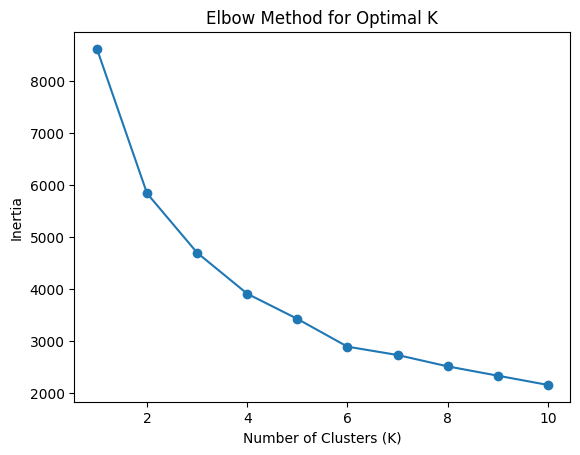

In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()


In [11]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
df_cluster['Cluster'] = clusters

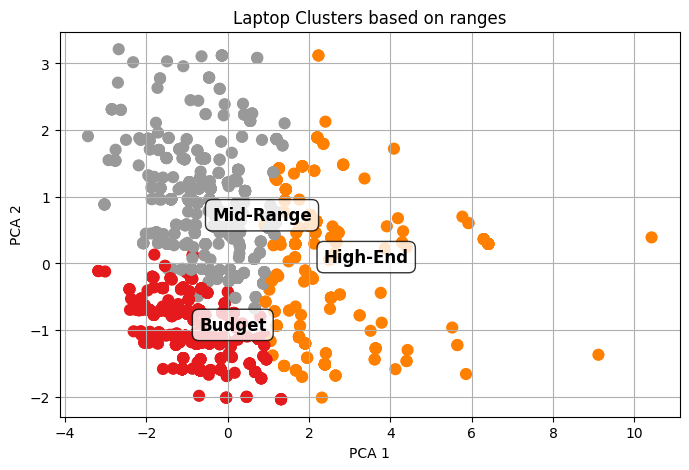

In [55]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled_features)

# Project centroids to PCA space
centroids_2d = pca.transform(kmeans.cluster_centers_)

# Define cluster labels (update if your mapping is different)
labels = ['Budget', 'High-End', 'Mid-Range']

plt.figure(figsize=(8, 5))
plt.scatter(reduced[:, 0], reduced[:, 1], c=clusters, cmap='Set1', s=60)

# Add text labels at centroid positions
for i, (x, y) in enumerate(centroids_2d):
    plt.text(x, y, labels[i], fontsize=12, fontweight='bold',
             bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.4'))
    
plt.title("Laptop Clusters based on ranges")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid()
plt.show()
